# RQ1: Are ratings and number of reviews an indicator of business success?

## Part 2: How do ratings change over time? Is there a clear profile difference between open and closed businesses?

- a) How do ratings deviate during each quarter of a business lifespan for open vs closed?
- b) How does average rating change during each quarter?

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

Set graph style defaults

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

Dor this analysis, we will use the table that summarises every review for each business.

In [3]:
df =  pd.read_pickle('../../data/prep/everyReview.pkl')

In [4]:
closedBiz = df[df['is_open'] == 0] #make a closed business list
openBiz = df[df['is_open'] == 1] #make an open business list

#Record lengths for future use
lenCB = int(len(closedBiz))
lenOB = int(len(openBiz))

This function is used to calculate the mean of lists

In [5]:
def calculateMean(avgList):
    return float(sum(avgList))/len(avgList)

## How do ratings deviate during each quarter of a business lifespan for open vs closed?

In this cell, we look at every review for each business and get the standard deviation of ratings for that business overall.

In [6]:
#lists to hold the standard devations of each business
closedStds = []
openStds = []

#Calculate Std. Dev of closed 
for i in range(len(closedBiz)): #for every closed business
    s = closedBiz['revrate'][i] #get all the ratings
    sortS = sorted(s, key=lambda tup: tup[0]) #sort from first to last review usinf tup[0], the date
    x,y = zip(*sortS) # x = the date, y = the rating
    standard = np.std(y) # std deviation of all ratings
    closedStds.append(standard) #add this to the list

#Calculate std. dev of open
for i in range(len(openBiz)):
    s = openBiz['revrate'][i]
    sortS = sorted(s, key=lambda tup: tup[0])
    x,y = zip(*sortS)
    standard = np.std(y)
    openStds.append(standard)

After calculating the average of all deviations, we can see below that on the surface there doesn't seem to be much of a difference between closed and open business when it comes to how mixed their ratings are.

Average Standard Deviation of Closed Business' Reviews: 1.0629774419594056
Average Standard Deviation of Open Business' Reviews: 1.0681105124597579


[Text(0,0,'Closed'), Text(0,0,'Open')]

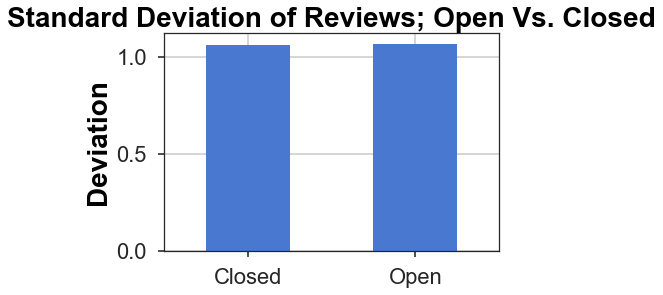

In [7]:
avg1 = float(sum(closedStds))/len(closedStds)
print("Average Standard Deviation of Closed Business' Reviews: " + str(avg1))

avg2 = float(sum(openStds))/len(openStds)
print("Average Standard Deviation of Open Business' Reviews: " + str(avg2))

st = pd.DataFrame([avg1,avg2])
plt = st.plot(kind='bar', legend=False)

plt.set_title("Standard Deviation of Reviews; Open Vs. Closed")
plt.set_ylabel("Deviation")
labels = ["Closed", "Open"]
plt.set_xticklabels(labels, rotation=0)

They both deviate on average by just over one star. 

Instead, let's look at how ratings deviate over each quarter of a business' lifespan. A "Quarter" of a businesses lifespan is defined as it's total reviews divided by 4. For example, if a business has 12 reviews, it's first quarter is reviews 1-3. 

This method removes the issue where some business go "inactive" on yelp for long periods for refurbishments, seasons, etc. Every quarter is guaranteed to have a review.

Further research could be done by dividing the lifespan evenly in 4 and getting all reviews within that date range.



In [8]:
#Empty lists that will hold all std deviations over each quarter.
closedStd1 = [] #all closed businesses, standard dev of quarter 1
openStd1 = [] #open business, quarter 2
closedStd2 = [] #closed businesses, quarter 2...
openStd2 = []
closedStd3 = []
openStd3 = []
closedStd4= []
openStd4 = []

This fuction will take all reviews within a given range/quarter of a business and calculate its standard deviation.

In [9]:
def calculateQuarterStd(startingQuarter, endingQuarter, quarterList):
    totalQuarter = (y[startingQuarter:endingQuarter]) #all ratings from start to finish of this quarter
    std = np.std(totalQuarter)
    quarterList.append(std)#append standard dev to master list

First, calculate all the std devs of each quarter for closed businesses. This produces 4 lists' std devs of q1, 2, 3 and 4.

In [10]:
import math 

for i in range(lenCB):
    s = closedBiz['revrate'][i] #get review info for business
    sortS = sorted(s, key=lambda tup: tup[0]) #sort from earliest to latest using the 'date' part of the tuple
    x,y = zip(*sortS) #x = the date, y = the rating
    
    if len(y) > 4: #take only the places with > 4 reviews for now
        quarter = (len(y)/4) #calculate one quarter
        q1 = math.floor(quarter) #end of 1st q
        q2 = math.floor(quarter*2) #end of 2nd q
        q3 = math.floor(quarter*3) # end of 3rd/start of last
        
        #calculate average rating deviations for 1st,2nd,3rd, and last quarter of life
        calculateQuarterStd(0, q1, closedStd1)
        calculateQuarterStd(q1, q2, closedStd2)
        calculateQuarterStd(q2, q3, closedStd3)
        calculateQuarterStd(q3, len(y), closedStd4)

Next, calculate all the std devs of each quarter for open businesses.

In [11]:
for i in range(lenOB):
    s = openBiz['revrate'][i] #get review info for business
    sortS = sorted(s, key=lambda tup: tup[0]) #sort from earliest to latest using the 'date' part of the tuple
    x,y = zip(*sortS) #x = the date, y = the rating
    
    if len(y) > 4: #take only the places with > 4 reviews for now
        quarter = (len(y)/4) #calculate one quarter
        q1 = math.floor(quarter) #end of 1st q
        q2 = math.floor(quarter*2) #end of 2nd q
        q3 = math.floor(quarter*3) # end of 3rd/start of last
        
         #calculate average rating deivations for 1st,2nd,3rd, and last quarter of life
        calculateQuarterStd(0, q1, openStd1)
        calculateQuarterStd(q1, q2, openStd2)
        calculateQuarterStd(q2, q3, openStd3)
        calculateQuarterStd(q3, len(y), openStd4)

Get the averages for all 8 lists to get average deviation for each quarter of open and closed businesses

In [12]:
openStdMean1 = calculateMean(openStd1) #Get mean of open business, quarter 1
openStdMean2 = calculateMean(openStd2) # mean of quarter 2..
openStdMean3 = calculateMean(openStd3)
openStdMean4 = calculateMean(openStd4)

closedStdMean1 = calculateMean(closedStd1)
closedStdMean2 = calculateMean(closedStd2)
closedStdMean3 = calculateMean(closedStd3)
closedStdMean4 = calculateMean(closedStd4)

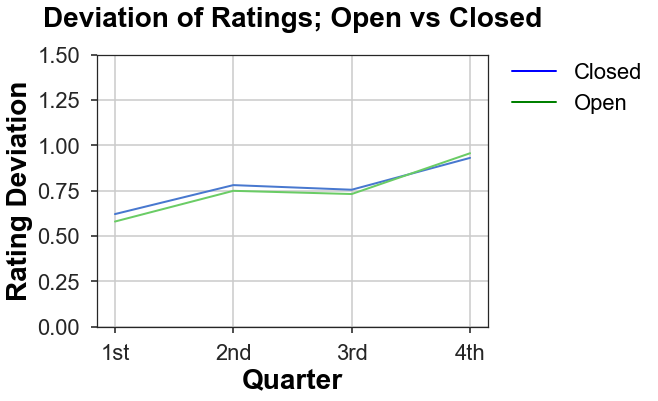

In [13]:
stdDF = pd.DataFrame([[openStdMean1, closedStdMean1], [openStdMean2, closedStdMean2], [openStdMean3, closedStdMean3], [openStdMean4, closedStdMean4]])

plt = stdDF.plot(figsize=(7,5), ylim=(0,1.5))
labels = ["", "1st", "2nd", "3rd", "4th"]
plt.set_title("Deviation of Ratings; Open vs Closed", y=1.08)
plt.set_xlabel('Quarter')
plt.set_ylabel('Rating Deviation')
plt.set_xticklabels(labels,rotation=0)

#Make the legend
blue_line = mlines.Line2D([], [], color='blue', marker='', markersize=15, label='Closed')
green_line = mlines.Line2D([], [], color='green', marker='', markersize=15, label='Open')
handles = [blue_line, green_line]
plt.legend(handles=handles, loc=(1.04, 0.75))

Surprisingly, closed and open businesses change in nearly the exact same way, as we can see from this graph.

They both start with deviating by half a star at the start of life, then varying more for the second, falling slightly for the 3rd, and then climbing toward one for the last quarter of life.

The graph below shows the difference between first and last:

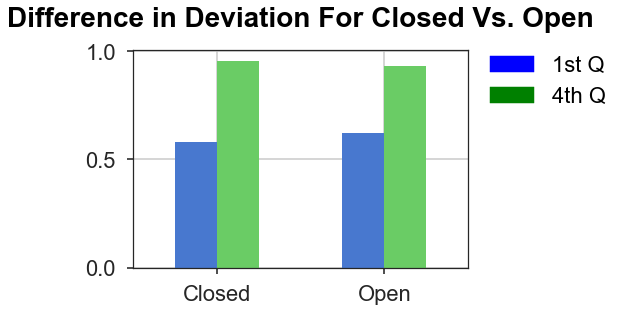

In [14]:
pos = pd.DataFrame([[closedStdMean1,closedStdMean4], [openStdMean1,openStdMean4]])
plt = pos.plot(kind='bar')

labels = ["Closed", "Open"]
plt.set_title("Difference in Deviation For Closed Vs. Open", y=1.08)
plt.set_xticklabels(labels, rotation=0)

blue_patch = mpatches.Patch(color='blue', label='1st Q')
green_patch = mpatches.Patch(color='green',label='4th Q')
handles = [blue_patch, green_patch]
plt.legend(handles=handles, loc=(1.04,0.7))

Save this data to a pickle file for use in the final notebook

In [15]:
stdDF.to_pickle('../../data/final/ratingDeviation.pkl')

## How does average rating change during each quarter?

For this analysis, we will carry out the same methods used above, except instead of calculating the std dev we just calculate the average.

In [16]:
#Empty lists will hold mean rating of each quarter
closedMeanFirst = []
openMeanFirst = []
closedMeanSecond = []
openMeanSecond = []
closedMeanThird = []
openMeanThird = []
closedMeanFourth= []
openMeanFourth = []

These functions will be used to calculate the mean ratings over each quarter of all businesses

In [17]:
#This function will calculate the average rating for each quarter
def calculateQuarterAverage(startingQuarter, endingQuarter, quarterList):
    totalQuarter = (y[startingQuarter:endingQuarter]) #all ratings from start to finish of this quarter
    sumRating = 0
    for i in totalQuarter: 
        sumRating = sumRating + i # sum each rating in this quarter
    avgRating = sumRating/len(totalQuarter) #get average
    quarterList.append(avgRating)#append average to master list

Calculating the mean rating for each quarter of closed businesses.

In [18]:
for i in range(lenCB):
    s = closedBiz['revrate'][i] #get review info for business
    sortS = sorted(s, key=lambda tup: tup[0]) #sort from earliest to latest using the 'date' part of the tuple
    x,y = zip(*sortS) #x = the date, y = the rating
    
    if len(y) > 4: #take only the places with > 4 reviews for now
        quarter = (len(y)/4) #calculate one quarter
        q1 = math.floor(quarter) #end of 1st q
        q2 = math.floor(quarter*2) #end of 2nd q
        q3 = math.floor(quarter*3) # end of 3rd/start of last
        
         #calculate average rating for 1st,2nd,3rd, and last quarter of life
        calculateQuarterAverage(0, q1, closedMeanFirst)
        calculateQuarterAverage(q1, q2, closedMeanSecond)
        calculateQuarterAverage(q2, q3, closedMeanThird)
        calculateQuarterAverage(q3, len(y), closedMeanFourth)
    else:
        if len(y) == 3: #If business has only 3 reviews
            closedMeanFirst.append(y[0]) #first review = q1
            closedMeanSecond.append(y[1]) #second review = q2
            closedMeanThird.append(y[2]) #last review = q3
            closedMeanFourth.append(y[2]) #last review = q4
        elif len(y) == 2: #if business has only 2 reviews
            closedMeanFirst.append(y[0]) #first = q1
            closedMeanSecond.append(y[0]) #first = q2
            closedMeanThird.append(y[1]) #last = q3
            closedMeanFourth.append(y[1]) #last = q4
        elif len(y) == 1: #If business has only 1 review, the rating is added across all quarters
            closedMeanFirst.append(y[0])
            closedMeanSecond.append(y[0])
            closedMeanThird.append(y[0])
            closedMeanFourth.append(y[0])

The exact same logic is applied to calculate the average ratings for open businesses

In [19]:
for i in range(lenOB):
    s = openBiz['revrate'][i]
    sortS = sorted(s, key=lambda tup: tup[0])
    x,y = zip(*sortS)
    
    if len(y) > 4:
        quarter = (len(y)/4)
        q1 = math.floor(quarter)
        q2 = math.floor(quarter*2)
        q3 = math.floor(quarter*3)
        
        calculateQuarterAverage(0, q1, openMeanFirst)
        calculateQuarterAverage(q1, q2, openMeanSecond)
        calculateQuarterAverage(q2, q3, openMeanThird)
        calculateQuarterAverage(q3, len(y), openMeanFourth)
    else:
        if len(y) == 3:
            openMeanFirst.append(y[0])
            openMeanSecond.append(y[1])
            openMeanThird.append(y[2])
            openMeanFourth.append(y[2])
        elif len(y) == 2:
            openMeanFirst.append(y[0])
            openMeanSecond.append(y[0])
            openMeanThird.append(y[1])
            openMeanFourth.append(y[1])
        elif len(y) == 1:
            openMeanFirst.append(y[0])
            openMeanSecond.append(y[0])
            openMeanThird.append(y[0])
            openMeanFourth.append(y[0])

Calculate means of all lists.

What this gives is a mean for each quarter for all open, and for all closed.
For example, "In the first quarter of life, open businesses have an average rating of __"

In [20]:
closedMeanFirstMean = calculateMean(closedMeanFirst)
closedMeanSecondMean = calculateMean(closedMeanSecond)
closedMeanThirdMean = calculateMean(closedMeanThird)
closedMeanFourthMean = calculateMean(closedMeanFourth)

openMeanFirstMean = calculateMean(openMeanFirst)
openMeanSecondMean = calculateMean(openMeanSecond)
openMeanThirdMean = calculateMean(openMeanThird)
openMeanFourthMean = calculateMean(openMeanFourth)

In [21]:
new = pd.DataFrame([[closedMeanFirstMean, openMeanFirstMean], [closedMeanSecondMean, openMeanSecondMean], [closedMeanThirdMean, openMeanThirdMean], [closedMeanFourthMean, openMeanFourthMean]])

new.columns = (["Closed", "Open"])
new

,Closed,Open
0,3.699858,3.746342
1,3.557177,3.666520
2,3.445098,3.615962
3,3.329741,3.585912


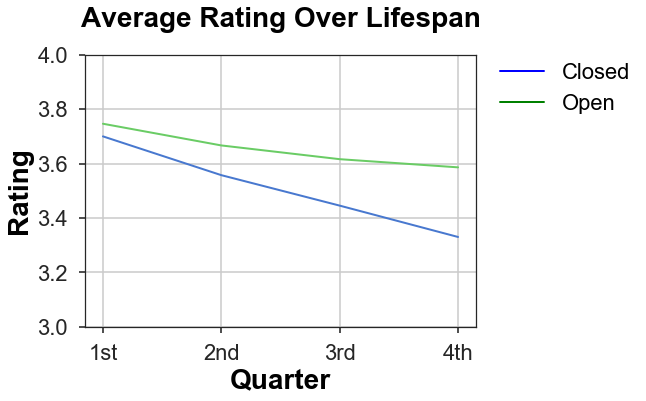

In [22]:
plt = new.plot(legend=False, ylim=(3,4),figsize=(7,5))

labels = ["", "1st", "2nd", "3rd", "4th"]
plt.set_title("Average Rating Over Lifespan", y=1.08)
plt.set_xlabel('Quarter')
plt.set_ylabel('Rating')
plt.set_xticklabels(labels,rotation=0)

#Make legend
blue_line = mlines.Line2D([], [], color='blue', marker='', markersize=15, label='Closed')
green_line = mlines.Line2D([], [], color='green', marker='', markersize=15, label='Open')
handles = [blue_line, green_line]
plt.legend(handles=handles, loc=(1.04, 0.75))

This graph shows that closed and open businesses start out more or less the same, at around 3.7 stars. Both fall, but closed businesses far more steeply as time progresses. Upon closure, closed businesses have fallen to the low 3's while open still lingers at the top.

The graph below shows the difference in rating for open and closed for the first and last quarters of its life

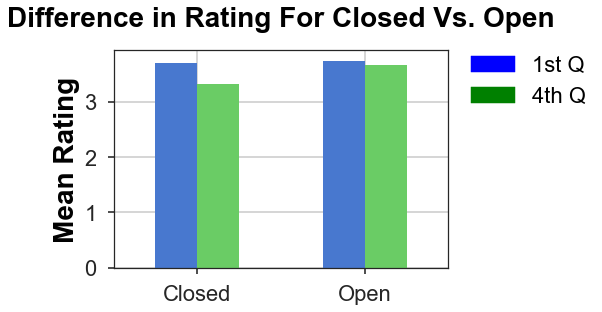

In [23]:
ha = pd.DataFrame([[closedMeanFirstMean,closedMeanFourthMean], [openMeanFirstMean,openMeanSecondMean]])
plt = ha.plot(kind='bar', legend=False)

labels = ["Closed", "Open"]
plt.set_title("Difference in Rating For Closed Vs. Open", y=1.08)
plt.set_xticklabels(labels, rotation=0)
plt.set_ylabel("Mean Rating")

blue_patch = mpatches.Patch(color='blue', label='1st Q')
green_patch = mpatches.Patch(color='green',label='4th Q')
handles = [blue_patch, green_patch]
plt.legend(handles=handles, loc=(1.04,0.7))

In [24]:
new.to_pickle('../../data/final/ratingChange.pkl')